In [1]:
# importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn import metrics

In [2]:
# Uploading Dataset

dataset=pd.read_csv("D:\Datasets\Employee.csv")
dataset

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [3]:
dataset["JoiningYear"].unique()

array([2017, 2013, 2014, 2016, 2015, 2012, 2018], dtype=int64)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


# EDA

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

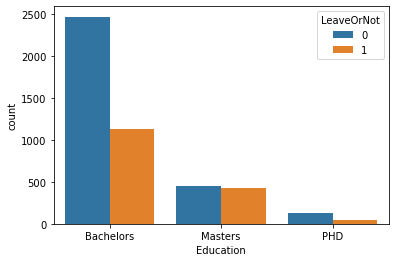

In [5]:
sns.countplot(dataset['Education'],hue=dataset['LeaveOrNot'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JoiningYear', ylabel='count'>

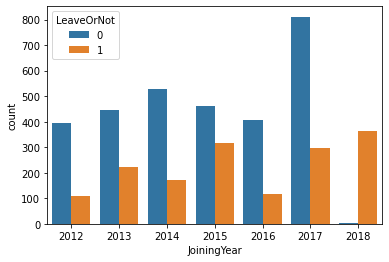

In [6]:
sns.countplot(dataset['JoiningYear'],hue=dataset['LeaveOrNot'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='count'>

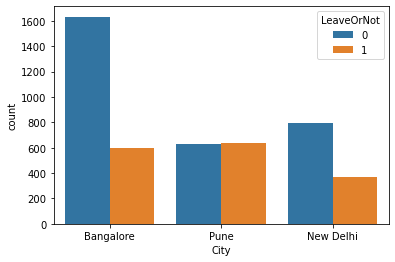

In [7]:
sns.countplot(dataset['City'],hue=dataset['LeaveOrNot'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentTier', ylabel='count'>

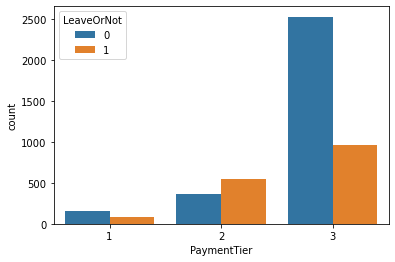

In [8]:
sns.countplot(dataset['PaymentTier'],hue=dataset['LeaveOrNot'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LeaveOrNot', ylabel='Age'>

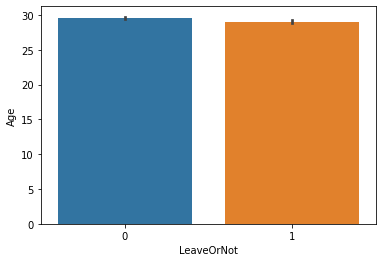

In [9]:
sns.barplot(dataset['LeaveOrNot'],dataset['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

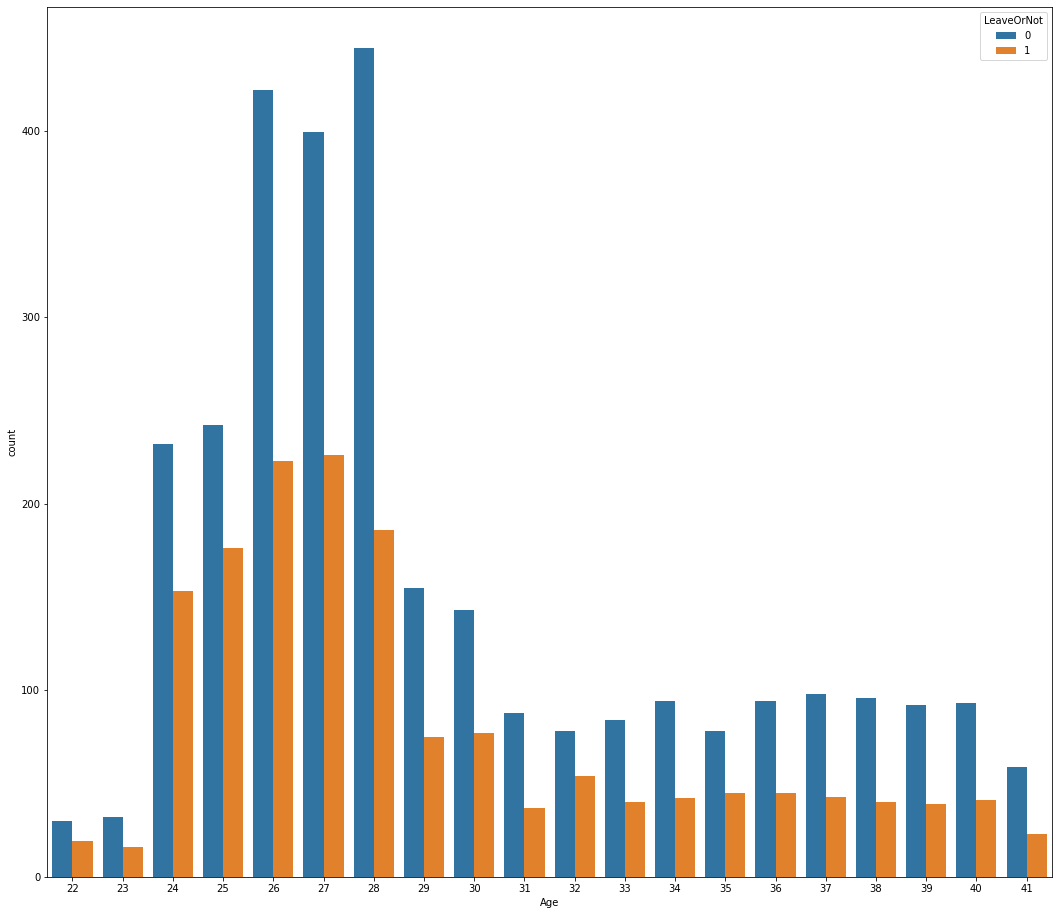

In [10]:
plt.figure(figsize=(18,16))
sns.countplot(dataset['Age'],hue=dataset['LeaveOrNot'])

In [11]:
age=[]
for x in dataset['Age']:
    if x>=21 and x<31:
        age.append("Young")
    else:
        age.append("Adult")
print(age)

['Adult', 'Young', 'Adult', 'Young', 'Young', 'Young', 'Adult', 'Adult', 'Young', 'Adult', 'Young', 'Adult', 'Adult', 'Adult', 'Adult', 'Young', 'Adult', 'Adult', 'Young', 'Young', 'Adult', 'Young', 'Adult', 'Young', 'Young', 'Young', 'Adult', 'Young', 'Adult', 'Young', 'Young', 'Young', 'Young', 'Adult', 'Adult', 'Young', 'Young', 'Adult', 'Young', 'Young', 'Adult', 'Young', 'Young', 'Adult', 'Adult', 'Young', 'Young', 'Adult', 'Adult', 'Young', 'Adult', 'Young', 'Adult', 'Adult', 'Adult', 'Young', 'Adult', 'Adult', 'Adult', 'Adult', 'Young', 'Young', 'Young', 'Young', 'Adult', 'Adult', 'Young', 'Young', 'Young', 'Adult', 'Young', 'Adult', 'Young', 'Young', 'Young', 'Adult', 'Young', 'Young', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Young', 'Young', 'Adult', 'Young', 'Adult', 'Young', 'Adult', 'Young', 'Young', 'Adult', 'Adult', 'Adult', 'Young', 'Adult', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 

In [12]:
dataset.insert(0,"AGE",age)

In [13]:
dataset

,AGE,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Adult,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Young,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Adult,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Young,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Young,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...,...
4648,Young,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Adult,Masters,2013,Pune,2,37,Male,No,2,1
4650,Young,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Young,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [14]:
dataset['AGE'].value_counts()

Young    3250
Adult    1403
Name: AGE, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE', ylabel='count'>

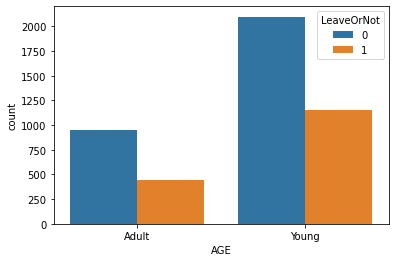

In [15]:
sns.countplot(dataset['AGE'],hue=dataset['LeaveOrNot'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

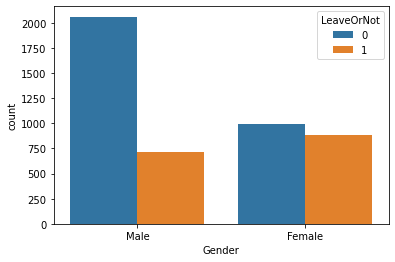

In [16]:
sns.countplot(dataset['Gender'],hue=dataset['LeaveOrNot'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EverBenched', ylabel='count'>

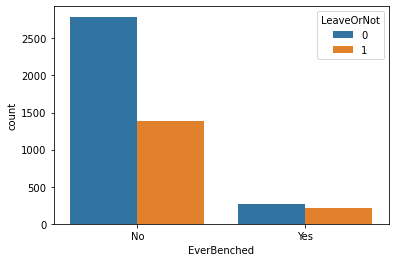

In [17]:
sns.countplot(dataset['EverBenched'],hue=dataset['LeaveOrNot'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='count'>

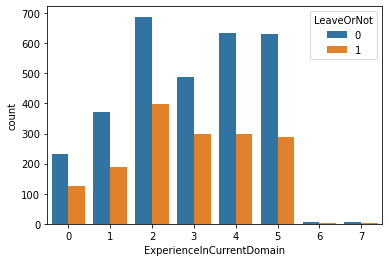

In [18]:
sns.countplot(dataset['ExperienceInCurrentDomain'],hue=dataset['LeaveOrNot'])

# 1.Find the No. Female Employees from Banglore leaving (198)

In [19]:
dataset.loc[(dataset['City']=='Bangalore') &  (dataset['Gender']=='Female') & (dataset['LeaveOrNot']==1)]

,AGE,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
7,Adult,Bachelors,2016,Bangalore,3,34,Female,No,2,1
69,Adult,Masters,2017,Bangalore,3,40,Female,No,2,1
70,Young,Bachelors,2018,Bangalore,3,23,Female,No,1,1
81,Adult,Bachelors,2013,Bangalore,3,31,Female,No,0,1
84,Young,Bachelors,2015,Bangalore,3,27,Female,Yes,5,1
...,...,...,...,...,...,...,...,...,...,...
4560,Young,Bachelors,2015,Bangalore,3,25,Female,No,3,1
4594,Adult,Bachelors,2013,Bangalore,3,36,Female,No,0,1
4612,Young,Bachelors,2012,Bangalore,3,23,Female,No,1,1
4632,Adult,Bachelors,2018,Bangalore,3,31,Female,No,2,1


# 2.Total how many employees are leaved(1600)

In [20]:
dataset.loc[(dataset['LeaveOrNot']==1) ]

,AGE,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
1,Young,Bachelors,2013,Pune,1,28,Female,No,3,1
3,Young,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Young,Masters,2017,Pune,3,24,Male,Yes,2,1
7,Adult,Bachelors,2016,Bangalore,3,34,Female,No,2,1
10,Young,Masters,2012,Bangalore,3,27,Male,No,5,1
...,...,...,...,...,...,...,...,...,...,...
4639,Young,Bachelors,2017,Bangalore,3,28,Male,No,0,1
4641,Adult,Bachelors,2016,Bangalore,1,33,Female,No,0,1
4644,Adult,Bachelors,2015,Pune,3,32,Female,Yes,1,1
4649,Adult,Masters,2013,Pune,2,37,Male,No,2,1


# 3.No.of employees leaving from tier 1 tier2 tier3

In [21]:
d=dataset.loc[(dataset['LeaveOrNot']==1)]
d

,AGE,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
1,Young,Bachelors,2013,Pune,1,28,Female,No,3,1
3,Young,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Young,Masters,2017,Pune,3,24,Male,Yes,2,1
7,Adult,Bachelors,2016,Bangalore,3,34,Female,No,2,1
10,Young,Masters,2012,Bangalore,3,27,Male,No,5,1
...,...,...,...,...,...,...,...,...,...,...
4639,Young,Bachelors,2017,Bangalore,3,28,Male,No,0,1
4641,Adult,Bachelors,2016,Bangalore,1,33,Female,No,0,1
4644,Adult,Bachelors,2015,Pune,3,32,Female,Yes,1,1
4649,Adult,Masters,2013,Pune,2,37,Male,No,2,1


In [22]:
d['PaymentTier'].value_counts()

3    961
2    550
1     89
Name: PaymentTier, dtype: int64

# 4.finding why employees from tier 3 are leaved

In [23]:
d1=d.loc[d['PaymentTier']==3]
d1

,AGE,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
3,Young,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Young,Masters,2017,Pune,3,24,Male,Yes,2,1
7,Adult,Bachelors,2016,Bangalore,3,34,Female,No,2,1
10,Young,Masters,2012,Bangalore,3,27,Male,No,5,1
12,Adult,Bachelors,2018,Pune,3,32,Male,Yes,5,1
...,...,...,...,...,...,...,...,...,...,...
4636,Adult,Masters,2014,New Delhi,3,37,Female,No,0,1
4637,Adult,Bachelors,2018,Bangalore,3,32,Male,Yes,2,1
4639,Young,Bachelors,2017,Bangalore,3,28,Male,No,0,1
4644,Adult,Bachelors,2015,Pune,3,32,Female,Yes,1,1


In [24]:
d1['EverBenched'].value_counts()

No     828
Yes    133
Name: EverBenched, dtype: int64

In [25]:
d1['AGE'].value_counts()

Young    684
Adult    277
Name: AGE, dtype: int64

In [26]:
d1['JoiningYear'].value_counts()

2018    341
2015    124
2017    119
2013    114
2014    109
2012     78
2016     76
Name: JoiningYear, dtype: int64

In [27]:
d1['Education'].value_counts()

Bachelors    671
Masters      255
PHD           35
Name: Education, dtype: int64

In [28]:
d1['City'].value_counts()

Bangalore    529
Pune         219
New Delhi    213
Name: City, dtype: int64

In [29]:
d1['ExperienceInCurrentDomain'].value_counts()

2    238
3    183
5    177
4    169
1    120
0     69
7      3
6      2
Name: ExperienceInCurrentDomain, dtype: int64

Most of the employee who leaved having experience more than year & they are young(21-31yr) & Most of them are Bachelores

In [30]:
del dataset['AGE']

In [31]:
l1=LabelEncoder()
dataset['Education']=l1.fit_transform(dataset['Education'])
dataset['JoiningYear']=l1.fit_transform(dataset['JoiningYear'])
dataset['City']=l1.fit_transform(dataset['City'])
dataset['Gender']=l1.fit_transform(dataset['Gender'])
dataset['EverBenched']=l1.fit_transform(dataset['EverBenched'])

In [32]:
dataset

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,5,0,3,34,1,0,0,0
1,0,1,2,1,28,0,0,3,1
2,0,2,1,3,38,0,0,2,0
3,1,4,0,3,27,1,0,5,1
4,1,5,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,1,0,3,26,0,0,4,0
4649,1,1,2,2,37,1,0,2,1
4650,1,6,1,3,27,1,0,5,1
4651,0,0,0,3,30,1,1,2,0


<AxesSubplot:>

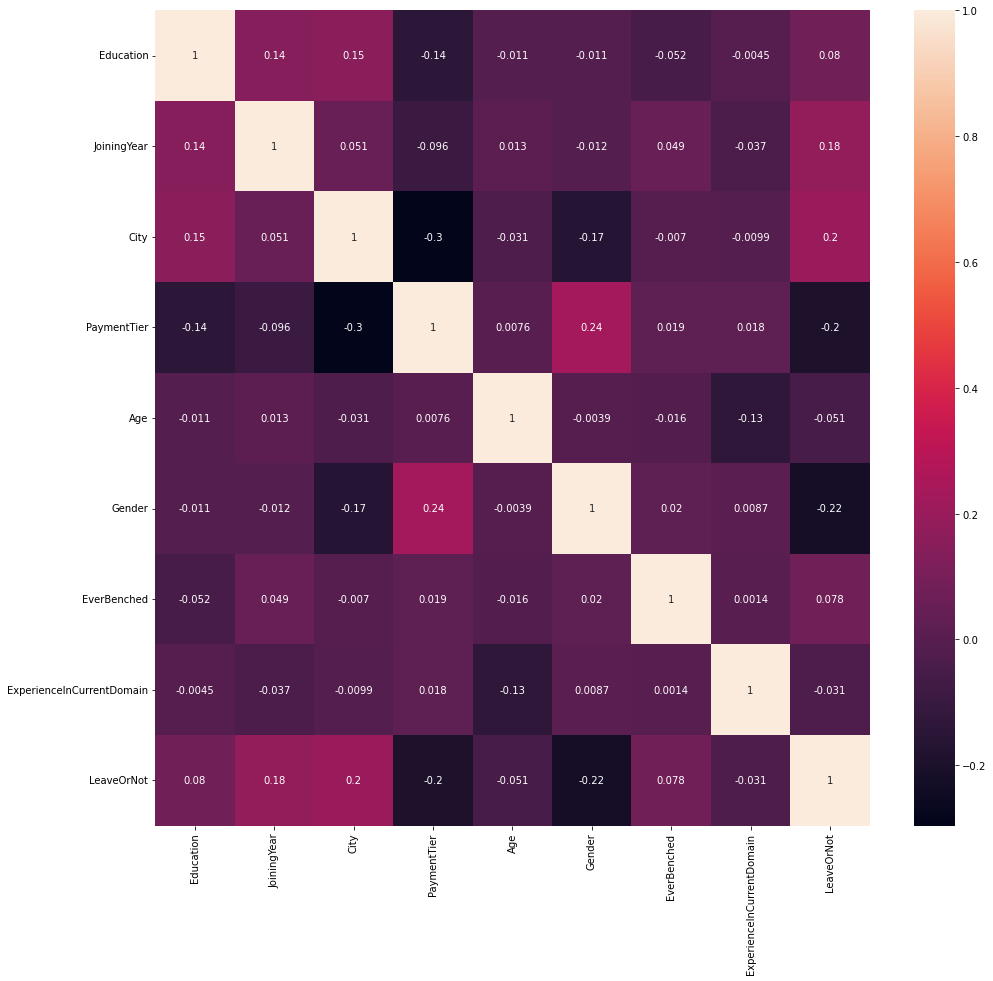

In [33]:
plt.figure(figsize=(16,15))
sns.heatmap(dataset.corr(),annot=True)

In [34]:
dataset['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

In [35]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [36]:
x.min()

0

In [37]:
x.max()

41

In [38]:
mas=MaxAbsScaler()
X=mas.fit_transform(x)

In [39]:
X.min()

0.0

In [40]:
X.max()

1.0

In [41]:
print(Counter(y))

Counter({0: 3053, 1: 1600})


In [42]:
s=SMOTE()
x_data,y_data=s.fit_resample(X,y)

In [43]:
print(Counter(y_data))

Counter({0: 3053, 1: 3053})


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=55)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(Counter(y_test))

(4884, 8)
(1222, 8)
(4884,)
(1222,)
Counter({1: 623, 0: 599})


# Logistic

In [45]:
logs=LogisticRegression()
logs.fit(x_train,y_train)
l_pred=logs.predict(x_test)
l_ac=accuracy_score(y_test,l_pred)*100
l_cm=confusion_matrix(y_test,l_pred)
l_cr=classification_report(y_test,l_pred)



print("Accurcay_score_logs: ",l_ac.round(2))
print("Classification_matrix: ",l_cm)
print("Report: ",l_cr)

Accurcay_score_logs:  63.34
Classification_matrix:  [[390 209]
 [239 384]]
Report:                precision    recall  f1-score   support

           0       0.62      0.65      0.64       599
           1       0.65      0.62      0.63       623

    accuracy                           0.63      1222
   macro avg       0.63      0.63      0.63      1222
weighted avg       0.63      0.63      0.63      1222



# SVM

In [46]:
s1=SVC()
s1.fit(x_train,y_train)
s_pred=s1.predict(x_test)
s_ac=accuracy_score(y_test,s_pred)*100
s_cm=confusion_matrix(y_test,s_pred)
s_cr=classification_report(y_test,s_pred)



print("Accurcay_score_svm: ",s_ac.round(2))
print("Classification_matrix: ",s_cm)
print("Report: ",s_cr)

Accurcay_score_svm:  78.97
Classification_matrix:  [[515  84]
 [173 450]]
Report:                precision    recall  f1-score   support

           0       0.75      0.86      0.80       599
           1       0.84      0.72      0.78       623

    accuracy                           0.79      1222
   macro avg       0.80      0.79      0.79      1222
weighted avg       0.80      0.79      0.79      1222



# KNN

In [47]:
k1=KNeighborsClassifier()
k1.fit(x_train,y_train)
k_pred=k1.predict(x_test)
k_ac=accuracy_score(y_test,k_pred)*100
k_cm=confusion_matrix(y_test,k_pred)
k_cr=classification_report(y_test,k_pred)



print("Accurcay_score_knn: ",k_ac.round(2))
print("Classification_matrix: ",k_cm)
print("Report: ",k_cr)

Accurcay_score_knn:  82.08
Classification_matrix:  [[515  84]
 [135 488]]
Report:                precision    recall  f1-score   support

           0       0.79      0.86      0.82       599
           1       0.85      0.78      0.82       623

    accuracy                           0.82      1222
   macro avg       0.82      0.82      0.82      1222
weighted avg       0.82      0.82      0.82      1222



# DecisionTree

In [48]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
d_pred=dt.predict(x_test)
d_ac=accuracy_score(y_test,d_pred)*100
d_cm=confusion_matrix(y_test,d_pred)
d_cr=classification_report(y_test,d_pred)



print("Accurcay_score_tree: ",d_ac.round(2))
print("Classification_matrix: ",d_cm)
print("Report: ",d_cr)

Accurcay_score_tree:  82.98
Classification_matrix:  [[515  84]
 [124 499]]
Report:                precision    recall  f1-score   support

           0       0.81      0.86      0.83       599
           1       0.86      0.80      0.83       623

    accuracy                           0.83      1222
   macro avg       0.83      0.83      0.83      1222
weighted avg       0.83      0.83      0.83      1222



## Cross Validation

In [49]:
skf=StratifiedKFold(n_splits=3,shuffle=True,random_state=55)
skf.get_n_splits(x_data,y_data)
print(skf)

StratifiedKFold(n_splits=3, random_state=55, shuffle=True)


In [50]:
for train,test in skf.split(x_data,y_data):
    X_Train,X_Test=x_data[train],x_data[test]
    Y_Train,Y_Test=y_data[train],y_data[test]
    
    # Log
    sco=cross_val_score(logs,X_Train,Y_Train,cv=skf)
    pre=cross_val_predict(logs,X_Test,Y_Test,cv=skf)
    l_ac_1=accuracy_score(Y_Test,pre)*100
    l_cm_1=confusion_matrix(Y_Test,pre)
    l_cr_1=classification_report(Y_Test,pre)
    
    # SVM
    sco1=cross_val_score(s1,X_Train,Y_Train,cv=skf)
    pre1=cross_val_predict(s1,X_Test,Y_Test,cv=skf)
    s_ac_1=accuracy_score(Y_Test,pre1)*100
    s_cm_1=confusion_matrix(Y_Test,pre1)
    s_cr_1=classification_report(Y_Test,pre1)
    
    # KNN
    sco2=cross_val_score(k1,X_Train,Y_Train,cv=skf)
    pre2=cross_val_predict(k1,X_Test,Y_Test,cv=skf)
    k_ac_1=accuracy_score(Y_Test,pre2)*100
    k_cm_1=confusion_matrix(Y_Test,pre2)
    k_cr_1=classification_report(Y_Test,pre2)
    
    # DecisionTree
    sco3=cross_val_score(dt,X_Train,Y_Train,cv=skf)
    pre3=cross_val_predict(dt,X_Test,Y_Test,cv=skf)
    d_ac_1=accuracy_score(Y_Test,pre3)*100
    d_cm_=confusion_matrix(Y_Test,pre3)
    d_cr_1=classification_report(Y_Test,pre3)
    
    print("Checking Balancing", Counter(Y_Test))
    print("Accurcacy_log:",l_ac_1,  "Accurcacy_svm:",s_ac_1,   "Accurcacy_knn:",k_ac_1,  "Accurcacy_tree:",d_ac_1)
    print("Matrix_log:",l_cm_1,  "Matrix_svm:",s_cm_1,  "Matrix_knn:",k_cm_1,  "Matrix_tree:",l_cm_1)
    print("Report_log:",l_cr_1,  "Report_svm:",s_cr_1,  "Report_knn:",k_cr_1,  "Report_tree:",d_cr_1)

Checking Balancing Counter({1: 1018, 0: 1018})
Accurcacy_log: 66.55206286836936 Accurcacy_svm: 75.58939096267191 Accurcacy_knn: 77.84872298624754 Accurcacy_tree: 78.38899803536346
Matrix_log: [[678 340]
 [341 677]] Matrix_svm: [[808 210]
 [287 731]] Matrix_knn: [[799 219]
 [232 786]] Matrix_tree: [[678 340]
 [341 677]]
Report_log:               precision    recall  f1-score   support

           0       0.67      0.67      0.67      1018
           1       0.67      0.67      0.67      1018

    accuracy                           0.67      2036
   macro avg       0.67      0.67      0.67      2036
weighted avg       0.67      0.67      0.67      2036
 Report_svm:               precision    recall  f1-score   support

           0       0.74      0.79      0.76      1018
           1       0.78      0.72      0.75      1018

    accuracy                           0.76      2036
   macro avg       0.76      0.76      0.76      2036
weighted avg       0.76      0.76      0.76      2036
 R

# Ensemble

In [51]:
vc=VotingClassifier(estimators=(("Logistic",logs),("KNN",k1),("SVM",s1),("DecisionTree",dt)))
vc.fit(x_train,y_train)
v_pred=vc.predict(x_test)
v_ac=accuracy_score(y_test,v_pred)*100
v_cr=classification_report(y_test,v_pred)
v_cm=confusion_matrix(y_test,v_pred)
print("Ensemble_ac:",v_ac.round(2))
print("Ensemble_report:",v_cr)
print("Ensemble_matrix:",v_cm)

Ensemble_ac: 81.26
Ensemble_report:               precision    recall  f1-score   support

           0       0.76      0.91      0.83       599
           1       0.89      0.72      0.80       623

    accuracy                           0.81      1222
   macro avg       0.82      0.81      0.81      1222
weighted avg       0.83      0.81      0.81      1222

Ensemble_matrix: [[543  56]
 [173 450]]


# RandomForest

In [52]:
rfc=RandomForestClassifier(n_estimators=10,random_state=55)
rfc.fit(x_train,y_train)
r_pred=rfc.predict(x_test)
r_ac=accuracy_score(y_test,r_pred)*100
r_cr=classification_report(y_test,r_pred)
r_cm=confusion_matrix(y_test,r_pred)
print("Ensemble_ac:",r_ac.round(2))
print("Ensemble_report:",r_cr)
print("Ensemble_matrix:",r_cm)

Ensemble_ac: 84.29
Ensemble_report:               precision    recall  f1-score   support

           0       0.81      0.89      0.85       599
           1       0.89      0.79      0.84       623

    accuracy                           0.84      1222
   macro avg       0.85      0.84      0.84      1222
weighted avg       0.85      0.84      0.84      1222

Ensemble_matrix: [[535  64]
 [128 495]]


# Bagging

In [53]:
bg=BaggingClassifier(base_estimator=k1,n_estimators=10,random_state=55)
bg.fit(x_train,y_train)
b_pred=bg.predict(x_test)
b_ac=accuracy_score(y_test,b_pred)*100
b_cr=classification_report(y_test,b_pred)
b_cm=confusion_matrix(y_test,b_pred)
print("Ensemble_ac:",b_ac.round(2))
print("Ensemble_report:",b_cr)
print("Ensemble_matrix:",b_cm)

Ensemble_ac: 82.0
Ensemble_report:               precision    recall  f1-score   support

           0       0.79      0.86      0.82       599
           1       0.86      0.78      0.82       623

    accuracy                           0.82      1222
   macro avg       0.82      0.82      0.82      1222
weighted avg       0.82      0.82      0.82      1222

Ensemble_matrix: [[517  82]
 [138 485]]
